In [5]:
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Creacion del dataframe y la base de datos junto con el formateo necesario para visualizar de mejor forma la data

In [6]:
#Intentar traer los datos a utilizar en formato csv
try:    
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df_FondosInversion_colectiva = pd.read_csv("C:/Users/migue/Music/MINTIC/mintic/modulo1/fuente de datos/Rentabilidades_de_los_Fondos_de_Inversi_n_Colectiva__FIC__20240914.csv")	
    print("Se cargo exitosamente la fuente de datos")

#Error en la lectura del archivo
except FileExistsError as e:
    print("Error encontrado: ",e)
    
#Cualquier otro tipo de error
except Exception as e:
    print("Error: ",e)
    
df_FondosInversion_colectiva


Se cargo exitosamente la fuente de datos


,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,63109,...,11813.7,0.0,0.0,0.0,6832704688.6,174.0,1.7,4.0,4.4,3.6
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,69537,...,13326.5,0.0,0.0,0.0,105940936849.3,6.0,2.1,2.3,1.0,1.1
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,97207,...,9521.4,0.0,0.0,0.0,1189565492.9,1.0,-61.1,6.7,4.9,-3.4
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,73593,...,7098.2,0.0,0.0,0.0,6487056745.4,20.0,-5.2,319.5,-33.8,-34.2
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,8742,...,2224.9,0.0,3.2,0.0,44325566471.2,17.0,6.4,7.2,9.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,53965,...,15402.0,14540000000.0,13786967958.9,0.0,18283835774.3,19.0,6.4,4.5,6.3,6.3
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10936,...,144117.4,16602216877.8,22313379342.7,-10198765402.9,465195438702.2,22.0,6.4,4.4,4.0,3.9
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,9452,...,2387.7,0.0,15000000.0,0.0,4479968228.4,117.0,32.0,0.8,-6.8,-1.6
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,48153,...,4308605.6,2717348162.5,7697812764.1,-700000000.0,122054686562.2,1224.0,5.5,5.5,3.7,4.3


validacion aleatoria de los datos

In [3]:
df_FondosInversion_colectiva.sample(50)

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
1394403,30/08/2019,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,8742,...,2486.7,41013000025.3,1780141078.0,0.0,221833296007.5,53.0,8.7,5.2,5.3,4.9
757271,06/08/2022,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10824,...,18208.9,0.0,0.0,0.0,986182058165.4,341.0,9.5,8.5,5.8,4.2
568424,17/09/2021,5,SF-SOCIEDAD FIDUCIARIA,20,Fiduciaria Corficolombiana S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,53954,...,38254.8,10185151069.8,12145459884.0,0.0,84933814116.2,9.0,-4.6,1.9,0.8,0.7
247295,28/04/2021,5,SF-SOCIEDAD FIDUCIARIA,22,Fiduciaria Bogotá S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10659,...,15675.5,0.0,44839159948.5,0.0,160560768280.1,1.0,-0.8,2.1,1.3,3.4
1143829,27/06/2022,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10936,...,146650.2,400029031.7,0.0,0.0,701301295391.4,1665.0,8.0,3.0,1.3,0.4
577253,30/05/2019,85,COMISIONISTAS DE BOLSA DE VALORES,26,Corredores Davivienda S.A.Comisionista De Bolsa,9,FONDOS DE INVERSIÓN COLECTIVA,3,FIC INMOBILIARIAS,63935,...,33124.4,0.0,0.0,0.0,26013941629.7,2.0,-1.5,193.8,79.7,162.0
1179966,06/05/2023,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10824,...,11734.4,0.0,0.0,0.0,154661208331.2,2.0,15.2,15.6,17.6,15.1
162402,04/11/2019,85,COMISIONISTAS DE BOLSA DE VALORES,62,Ultraserfinco S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,60117,...,13163.0,0.1,0.0,0.0,22427641458.0,344.0,1.2,6.5,5.8,7.1
515078,23/02/2020,85,COMISIONISTAS DE BOLSA DE VALORES,62,Ultraserfinco S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,58980,...,21354.3,0.1,0.0,0.0,107322159584.6,1145.0,5.6,6.3,6.2,6.1
1869018,09/06/2024,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,58247,...,17.7,0.0,0.0,0.0,1913055566322.3,20.0,0.0,14.1,16.9,14.8


Validacion de cantidad de columnas y filas

In [4]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_FondosInversion_colectiva = pd.DataFrame(df_FondosInversion_colectiva)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_FondosInversion_colectiva.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'Datos del dataframe: \nFilas: {num_rows} \nColumnas: {num_cols}')

Datos del dataframe: 
Filas: 2165934 
Columnas: 26


---------------------------------------------Verificacion de cuantos datos hay por cada tipo de dato en columnas-------------------------------------

In [5]:
df_FondosInversion_colectiva['TIPO_ENTIDAD'].value_counts().reset_index()

,TIPO_ENTIDAD,count
0,5,1457796
1,85,659843
2,87,48295


In [6]:
df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

,NOMBRE_TIPO_ENTIDAD,count
0,SF-SOCIEDAD FIDUCIARIA,1457796
1,COMISIONISTAS DE BOLSA DE VALORES,659843
2,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,48295


In [7]:
df_FondosInversion_colectiva['NOMBRE_ENTIDAD'].value_counts().reset_index()

,NOMBRE_ENTIDAD,count
0,Alianza Fiduciaria S.A.,384409
1,Btg Pactual,135938
2,Fiduciaria Corficolombiana S.A.,129919
3,Credicorp Capital,126476
4,Corredores Davivienda S.A.Comisionista De Bolsa,121583
5,Fiduciaria De Occidente S.A. - Fiduoccidente ...,99396
6,Fiduciaria Bogotá S.A.,91688
7,Fiduciaria Bancolombia S.A. Sociedad Fiduciaria,82620
8,Fiduciaria Central S.A. Sigla Fiducentral S.A.,78625
9,Bbva Asset Management S.A. Sociedad Fiduciaria,73377


In [8]:
df_FondosInversion_colectiva['CODIGO_ENTIDAD'].value_counts().reset_index()

,CODIGO_ENTIDAD,count
0,16,384409
1,14,135938
2,21,131441
3,20,129919
4,22,129735
5,28,126476
6,26,121583
7,62,100249
8,3,95576
9,31,82620


In [9]:
df_FondosInversion_colectiva['SUBTIPO_NEGOCIO'].value_counts().reset_index()

,SUBTIPO_NEGOCIO,count
0,1,1438935
1,7,624622
2,3,52487
3,2,42195
4,6,7695


In [10]:
df_FondosInversion_colectiva['NOMBRE_SUBTIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_SUBTIPO_PATRIMONIO,count
0,FIC DE TIPO GENERAL,1438935
1,FONDOS DE CAPITAL PRIVADO,624622
2,FIC INMOBILIARIAS,52487
3,FIC DE MERCADO MONETARIO,42195
4,FIC BURSATILES,7695


In [11]:
df_FondosInversion_colectiva['NOMBRE_SUBTIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_SUBTIPO_PATRIMONIO,count
0,FIC DE TIPO GENERAL,1438935
1,FONDOS DE CAPITAL PRIVADO,624622
2,FIC INMOBILIARIAS,52487
3,FIC DE MERCADO MONETARIO,42195
4,FIC BURSATILES,7695


In [12]:
df_FondosInversion_colectiva['CODIGO_NEGOCIO'].value_counts().reset_index()

,CODIGO_NEGOCIO,count
0,10936,37650
1,53954,36143
2,22969,34656
3,10659,28300
4,8734,26173
...,...,...
840,121416,2
841,60527,1
842,105787,1
843,109465,1


In [13]:
df_FondosInversion_colectiva['fecha'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])

# Obtener la fecha máxima y mínima
fecha_maxima = df_FondosInversion_colectiva['fecha'].max()
fecha_minima = df_FondosInversion_colectiva['fecha'].min()

print("Fecha máxima:", fecha_maxima)
print("Fecha mínima:", fecha_minima)

Fecha máxima: 2024-09-11 00:00:00
Fecha mínima: 2016-01-01 00:00:00


C:\Users\migue\AppData\Local\Temp\ipykernel_19024\4072824086.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_FondosInversion_colectiva['fecha'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])


In [14]:
df_FondosInversion_colectiva['TIPO_NEGOCIO'].value_counts()

TIPO_NEGOCIO
9    2165934
Name: count, dtype: int64

Posible eliminacion del tipo de negocio y nom. negocio. Dado que en todas las filas se repite el mismo codigo y mismo nombre de negocio

Validacion de datos NO NULOS

In [15]:
df_FondosInversion_colectiva.notna().sum()

FECHA_CORTE                                         2165934
TIPO_ENTIDAD                                        2165934
NOMBRE_TIPO_ENTIDAD                                 2165934
CODIGO_ENTIDAD                                      2165934
NOMBRE_ENTIDAD                                      2165934
TIPO_NEGOCIO                                        2165934
NOMBRE_TIPO_PATRIMONIO                              2165934
SUBTIPO_NEGOCIO                                     2165934
NOMBRE_SUBTIPO_PATRIMONIO                           2165934
CODIGO_NEGOCIO                                      2165934
NOMBRE_PATRIMONIO                                   2165934
PRINCIPAL_COMPARTIMENTO                             2165934
TIPO_PARTICIPACION                                  2165934
RENDIMIENTOS_ABONADOS                               2165934
PRECIERRE_FONDO_DIA_T                               2165934
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    2165934
VALOR_UNIDAD_OPERACIONES_DIA_T          

Validacion de datos Nulos

In [16]:
df_FondosInversion_colectiva.isna().sum()

FECHA_CORTE                                         0
TIPO_ENTIDAD                                        0
NOMBRE_TIPO_ENTIDAD                                 0
CODIGO_ENTIDAD                                      0
NOMBRE_ENTIDAD                                      0
TIPO_NEGOCIO                                        0
NOMBRE_TIPO_PATRIMONIO                              0
SUBTIPO_NEGOCIO                                     0
NOMBRE_SUBTIPO_PATRIMONIO                           0
CODIGO_NEGOCIO                                      0
NOMBRE_PATRIMONIO                                   0
PRINCIPAL_COMPARTIMENTO                             0
TIPO_PARTICIPACION                                  0
RENDIMIENTOS_ABONADOS                               0
PRECIERRE_FONDO_DIA_T                               0
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    0
VALOR_UNIDAD_OPERACIONES_DIA_T                      0
APORTES_RECIBIDOS                                   0
RETIROS_REDENCIONES         

Confirmamos que la data se puede trabajar bien, dado que no hay datos nulos y no tenemos que recurrir o otras tecnicas para solventar el problema

In [17]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_FondosInversion_colectiva.describe()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,...,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,fecha
count,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,...,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934
mean,31.2,26.6,9.0,2.8,56329.6,1.2,635.6,26800601.4,160007493836.6,645079892210.2,...,3310246439.0,3250164539.0,-25796145.4,160041201963.7,4194.3,631408123631088733079470080.0,126456183574563568821993472.0,27810244690566532.0,46299076.8,2020-12-05 10:55:55.202514176
min,5.0,3.0,9.0,1.0,2713.0,1.0,5.0,-710090588833.6,-58653463459.0,0.0,...,-0.2,-12490602.2,-3099999999399.0,-56425862649.6,0.0,-108023068920482.0,-18744659.0,-247.5,-153.5,2016-01-01 00:00:00
25%,5.0,16.0,9.0,1.0,29495.0,1.0,504.0,0.0,3941332724.7,314504.0,...,0.0,0.0,0.0,3944277670.6,2.0,0.0,-0.1,0.0,0.0,2018-12-12 00:00:00
50%,5.0,21.0,9.0,1.0,59342.0,1.0,536.0,973929.4,22594370963.9,1696881.9,...,0.0,0.0,0.0,22606362015.6,15.0,3.7,4.7,4.5,3.9,2021-03-19 00:00:00
75%,85.0,31.0,9.0,7.0,73593.0,1.0,800.0,13473576.3,100600921545.3,7735792.0,...,0.7,268897.5,0.0,100638568834.8,174.0,10.2,11.0,11.1,9.5,2023-01-28 00:00:00
max,87.0,97.0,9.0,7.0,121580.0,2.0,825.0,518355711846.6,20575931167867.6,7590328546682310.0,...,10135099698650.0,10135003044471.9,457248295031.4,20566319829428.3,2849426803.8,97798776597479386416198260359168.0,6435146136200000167149035323392.0,60235154423262094557184.0,100000000000000.0,2024-09-11 00:00:00
std,37.6,18.5,0.0,2.7,30337.0,0.4,147.6,2234734740.2,631343695806.2,41570484302889.7,...,23902762770.2,23491467118.0,3059820525.0,631423421622.1,1936345.6,201941119238288943636801388544.0,21215792223669752970432479232.0,40928649876267196416.0,67948292223.4,NaN


In [18]:
df_FondosInversion_colectiva.describe(include=['object'])

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,2165934,2165934,2165934,2165934,2165934,2165934
unique,3177,3,46,1,5,824
top,11/04/2024,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,943,1457796,384409,2165934,1438935,37650


Identificacion de los valores unicos que hay por columna

In [19]:
# Identificar valores únicos por columna
print("\nValores únicos por columna:")
for column in df_FondosInversion_colectiva.columns:
    unique_values = df_FondosInversion_colectiva[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


Valores únicos por columna:

FECHA_CORTE (3177 valores únicos):
['20/07/2020' '12/09/2021' '09/12/2022' '23/08/2019' '04/06/2017'
 '27/04/2021' '02/09/2023' '22/03/2024' '13/04/2017' '21/12/2019']
...

TIPO_ENTIDAD (3 valores únicos):
[87  5 85]

NOMBRE_TIPO_ENTIDAD (3 valores únicos):
['SOCIEDADES ADMINISTRADORAS DE INVERSIÓN' 'SF-SOCIEDAD FIDUCIARIA'
 'COMISIONISTAS DE BOLSA DE VALORES']

CODIGO_ENTIDAD (40 valores únicos):
[11 39  7 38  3 16 18 28 34 68]
...

NOMBRE_ENTIDAD (46 valores únicos):
['Progresion Sociedad Administradora De Inversion S.A.'
 'Sociedad Fiduciaria De Desarrollo Agropecuario S.A.'
 'Skandia Fiduciaria S.A.'
 'Fiduciaria Central S.A. Sigla Fiducentral S.A.'
 'Bbva Asset Management S.A. Sociedad Fiduciaria'
 'Alianza Fiduciaria S.A.' 'Fiduciaria Popular S.A. - Fiduciar S.A.'
 'Credicorp Capital' 'Servitrust Gnb Sudameris S.A.'
 'Global Securities S.A. Comisionista De Bolsa']
...

TIPO_NEGOCIO (1 valores únicos):
[9]

NOMBRE_TIPO_PATRIMONIO (1 valores únicos):
[

GRAFICOS

Grafico de bigotes para visualizar valores atipicos y donde se concentra la informacion

KeyboardInterrupt: 

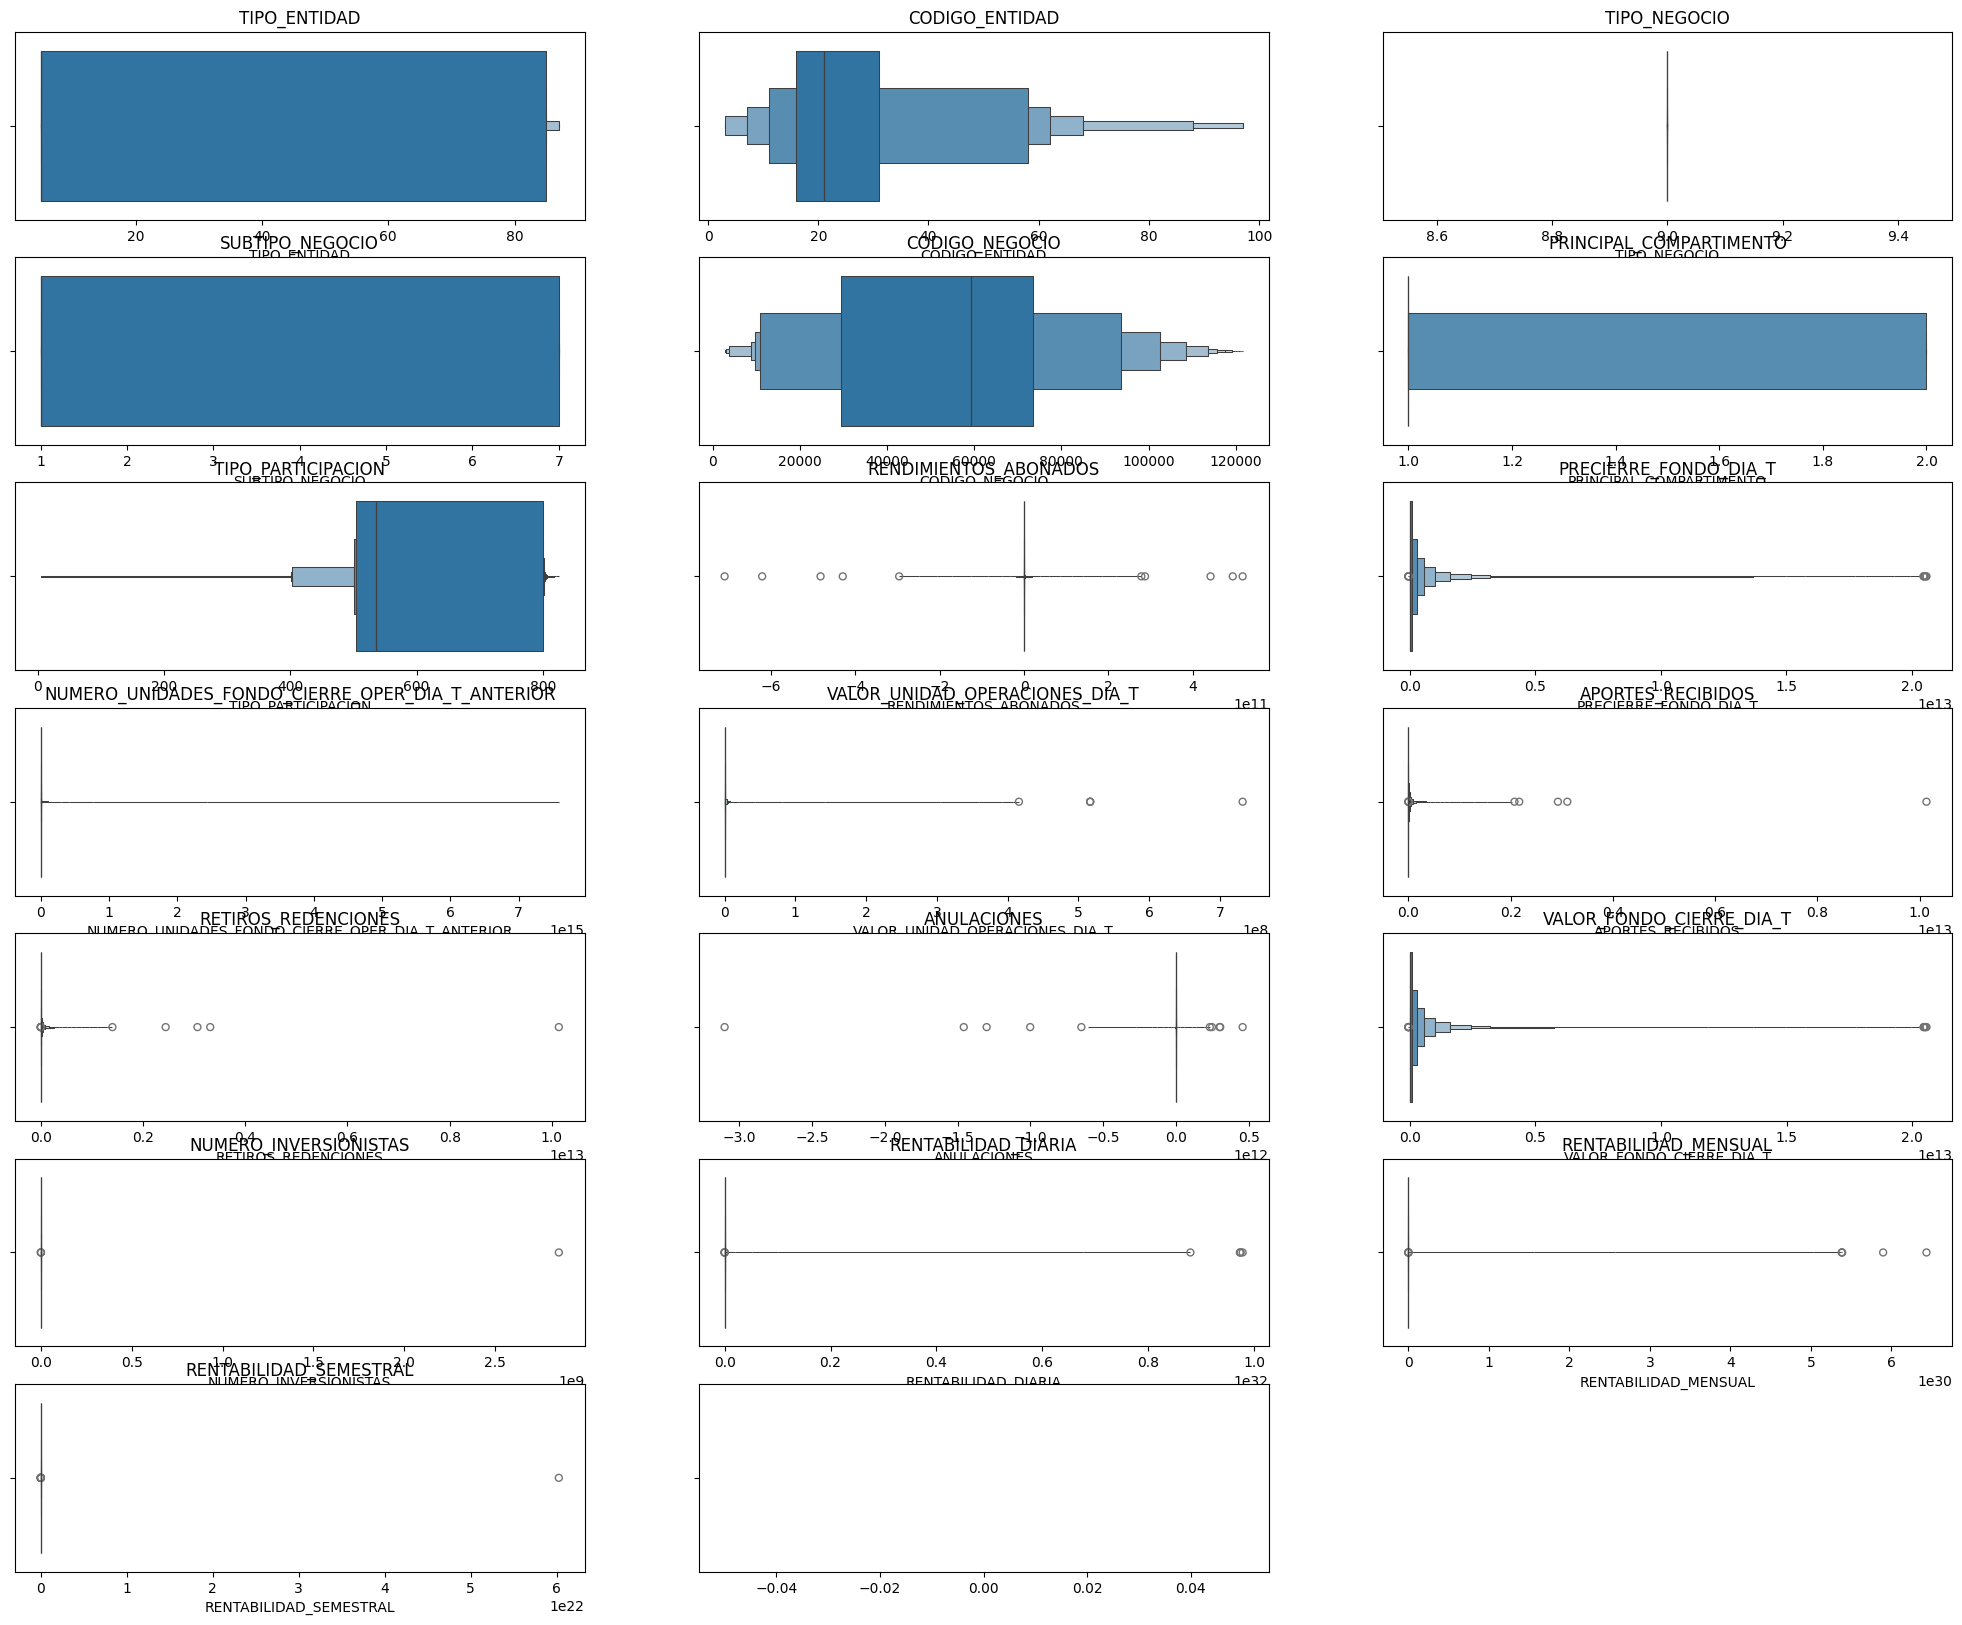

In [12]:
import matplotlib.pyplot as plt

numeric_cols = df_FondosInversion_colectiva.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula cuántas filas se necesitan

plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(data=df_FondosInversion_colectiva, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()



NOTA: VARIFICAR POR QUE LA RENTABILIDAD ANUAL Y SEMESTRAL SE MANTIENE EN 0 EN SU MAYORIA, DADO QUE HAY DATOS QUE SUPERAN ESTO POR MUCHO

Grafica de barras ver la rentabilidad anual acorde al tipo de entidad

In [18]:

resultado = df_FondosInversion_colectiva.groupby('NOMBRE_TIPO_ENTIDAD')['RENTABILIDAD_ANUAL'].mean().reset_index()


# Crear el gráfico de barras y mostrar la frecuencia encima de cada barra
fig = px.bar(x=resultado['NOMBRE_TIPO_ENTIDAD'], 
             y=resultado['RENTABILIDAD_ANUAL'],
             labels={'x':'Nombre de tipo entidad', 'y':'Rentabilidad anual'},
             title='Rentabilidad Anual por Tipo de Entidad',
             text=resultado['RENTABILIDAD_ANUAL']  # Mostrar la frecuencia encima de las barras
            )

fig.update_layout(height=700, width=800)

# Ajustar el formato del texto encima de las barras
fig.update_traces(textposition='outside')  # Colocar las etiquetas fuera de las barras

# Mostrar gráfico
fig.show()

" # Agrupar por NOMBRE_TIPO_ENTIDAD y calcular la media de RENTABILIDAD_ANUAL\nresultado = df_FondosInversion_colectiva.groupby('NOMBRE_TIPO_ENTIDAD')['RENTABILIDAD_ANUAL'].mean().reset_index()\n\n# Crear la gráfica de barras\nplt.figure(figsize=(12, 8))\nax = plt.bar(resultado['NOMBRE_TIPO_ENTIDAD'], resultado['RENTABILIDAD_ANUAL'], color='blue')\n\n# Añadir la cantidad en cada barra\nfor i, v in enumerate(resultado['RENTABILIDAD_ANUAL']):\n    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)\n\n# Títulos y etiquetas\nplt.title('Rentabilidad Anual por Tipo de Entidad')\nplt.xlabel('Tipo de Entidad')\nplt.ylabel('Rentabilidad Anual')\nplt.xticks(rotation=45) \n\nplt.tight_layout()  # Ajustar layout\nplt.show() "

In [16]:


# Contar la frecuencia de cada entidad y convertirlo en un DataFrame
frecuencia_entidades = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

# Renombrar las columnas para mejor legibilidad
frecuencia_entidades.columns = ['Nombre de tipo entidad', 'Frecuencia']

# Crear el gráfico de barras y mostrar la frecuencia encima de cada barra
fig = px.bar(x=frecuencia_entidades['Nombre de tipo entidad'], 
             y=frecuencia_entidades['Frecuencia'],
             labels={'x':'Nombre de entidad', 'y':'Frecuencia'},
             title='Frecuencia de Nombre de entidad',
             text=frecuencia_entidades['Frecuencia']  # Mostrar la frecuencia encima de las barras
            )

fig.update_layout(height=800, width=1000)

# Ajustar el formato del texto encima de las barras
fig.update_traces(textposition='outside')  # Colocar las etiquetas fuera de las barras

# Mostrar gráfico
fig.show()


In [19]:

# Contar la frecuencia de cada entidad y convertirlo en un DataFrame
frecuencia_entidades = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

# Renombrar las columnas para mejor legibilidad
frecuencia_entidades.columns = ['Nombre de tipo entidad', 'Frecuencia']

# Crear gráfico de pastel
fig = px.pie(names=frecuencia_entidades['Nombre de tipo entidad'], 
             values=frecuencia_entidades['Frecuencia'],
             title='Proporción de tipos de entidades')

# Mostrar gráfico
fig.show()

Eliminamos 2 columnas que no eran necesarias para la base de datos, dado que no aportaba informacion relevante y se repetian en todas las filas. (TIPO_NEGOCIO y NOMBRE_TIPO_PATRIMONIO)

In [23]:
columnas_a_eliminar = [
                        'TIPO_NEGOCIO','NOMBRE_TIPO_PATRIMONIO'
                        ]

try:
    df_FondosInversion_colectiva = df_FondosInversion_colectiva.drop(columns=columnas_a_eliminar)
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

df_FondosInversion_colectiva

Las columnas seleccionadas se eliminaron con éxito


,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,NOMBRE_PATRIMONIO,PRINCIPAL_COMPARTIMENTO,...,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,fecha
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,1,FIC DE TIPO GENERAL,63109,FONDO DE INVERSION COLECTIVA ABIERTO PROGRESIO...,1,...,0.0,0.0,0.0,6832704688.6,174.0,1.7,4.0,4.4,3.6,2020-07-20
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,1,FIC DE TIPO GENERAL,69537,FONDO DE INVERSION COLECTIVA ABIERTO FIC 600,1,...,0.0,0.0,0.0,105940936849.3,6.0,2.1,2.3,1.0,1.1,2021-09-12
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,1,FIC DE TIPO GENERAL,97207,FONDO DE INVERSIÓN COLECTIVA CON PACTO DE PERM...,1,...,0.0,0.0,0.0,1189565492.9,1.0,-61.1,6.7,4.9,-3.4,2022-12-09
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,7,FONDOS DE CAPITAL PRIVADO,73593,FCP VALOR FORESTAL CACAO 01 (EN LIQUIDACIÓN),2,...,0.0,0.0,0.0,6487056745.4,20.0,-5.2,319.5,-33.8,-34.2,2019-08-23
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,1,FIC DE TIPO GENERAL,8742,FIC ABIERTO BBVA FAM CON PARTICIPACIONES DIFER...,1,...,0.0,3.2,0.0,44325566471.2,17.0,6.4,7.2,9.2,0.0,2017-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,1,FIC DE TIPO GENERAL,53965,FIC CORPORATIVO II,1,...,14540000000.0,13786967958.9,0.0,18283835774.3,19.0,6.4,4.5,6.3,6.3,2019-06-25
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,1,FIC DE TIPO GENERAL,10936,FONDO ABIERTO ALIANZA,1,...,16602216877.8,22313379342.7,-10198765402.9,465195438702.2,22.0,6.4,4.4,4.0,3.9,2019-05-22
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,1,FIC DE TIPO GENERAL,9452,FONDO DE INVERSIÓN COLECTIVA ABIERTO CON PACTO...,1,...,0.0,15000000.0,0.0,4479968228.4,117.0,32.0,0.8,-6.8,-1.6,2018-09-12
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,1,FIC DE TIPO GENERAL,48153,FONDO DE INVERSION COLECTIVA ABIERTO ITAU CORT...,1,...,2717348162.5,7697812764.1,-700000000.0,122054686562.2,1224.0,5.5,5.5,3.7,4.3,2020-01-30


NOTA: PREGUNTARLE AL PROFE ACERCA DEL VALOR NUMERO DE LA COLUMNA "VALOR_FONDO_CIERRE_DIA_T" DADO QUE ESOS NUMEROS CAUSAN INCERTIDUMBRE

Reemplazamos el nombre de la columna "VALOR_UNIDAD_OPERACIONES_DIA_T" por "VALOR_OPERACIONES_DIA_T" para entender la funcionalidad de las dinamicas diarias con respecto el TRM

In [24]:
df_FondosInversion_colectiva.rename(columns={'VALOR_UNIDAD_OPERACIONES_DIA_T': 'VALOR_OPERACIONES_DIA_T'})

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,NOMBRE_PATRIMONIO,PRINCIPAL_COMPARTIMENTO,...,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,fecha
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,1,FIC DE TIPO GENERAL,63109,FONDO DE INVERSION COLECTIVA ABIERTO PROGRESIO...,1,...,0.0,0.0,0.0,6832704688.6,174.0,1.7,4.0,4.4,3.6,2020-07-20
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,1,FIC DE TIPO GENERAL,69537,FONDO DE INVERSION COLECTIVA ABIERTO FIC 600,1,...,0.0,0.0,0.0,105940936849.3,6.0,2.1,2.3,1.0,1.1,2021-09-12
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,1,FIC DE TIPO GENERAL,97207,FONDO DE INVERSIÓN COLECTIVA CON PACTO DE PERM...,1,...,0.0,0.0,0.0,1189565492.9,1.0,-61.1,6.7,4.9,-3.4,2022-12-09
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,7,FONDOS DE CAPITAL PRIVADO,73593,FCP VALOR FORESTAL CACAO 01 (EN LIQUIDACIÓN),2,...,0.0,0.0,0.0,6487056745.4,20.0,-5.2,319.5,-33.8,-34.2,2019-08-23
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,1,FIC DE TIPO GENERAL,8742,FIC ABIERTO BBVA FAM CON PARTICIPACIONES DIFER...,1,...,0.0,3.2,0.0,44325566471.2,17.0,6.4,7.2,9.2,0.0,2017-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,1,FIC DE TIPO GENERAL,53965,FIC CORPORATIVO II,1,...,14540000000.0,13786967958.9,0.0,18283835774.3,19.0,6.4,4.5,6.3,6.3,2019-06-25
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,1,FIC DE TIPO GENERAL,10936,FONDO ABIERTO ALIANZA,1,...,16602216877.8,22313379342.7,-10198765402.9,465195438702.2,22.0,6.4,4.4,4.0,3.9,2019-05-22
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,1,FIC DE TIPO GENERAL,9452,FONDO DE INVERSIÓN COLECTIVA ABIERTO CON PACTO...,1,...,0.0,15000000.0,0.0,4479968228.4,117.0,32.0,0.8,-6.8,-1.6,2018-09-12
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,1,FIC DE TIPO GENERAL,48153,FONDO DE INVERSION COLECTIVA ABIERTO ITAU CORT...,1,...,2717348162.5,7697812764.1,-700000000.0,122054686562.2,1224.0,5.5,5.5,3.7,4.3,2020-01-30
